---

# <center>판다스 시각화</center>

---

# Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
sns.__version__

'0.12.2'

# Load Dataset

# <center>멤버십 고객 탈회 예측</center>

컬럼 | 설명 | 컬럼 | 설명
---|---|---|---
id | 멤버십 번호 | MEMBERSHIP_TERM_YEARS | 멤버십 기간
ANNUAL_FEES | 연간 회비 | MEMBER_MARITAL_STATUS | 기혼 여부, M(기혼), S(미혼)
MEMBER_GENDER | 성별, M(남),F(여) | MEMBER_ANNUAL_INCOME | 연봉(연간 수입)
MEMBER_OCCUPATION_CD | 직업 | MEMBERSHIP_PACKAGE | 멤버십 유형
MEMBER_AGE_AT_ISSUE | 나이 | ADDITIONAL_MEMBERS | 가족 회원
PAYMENT_MODE | 지불 방식 | AGENT_CODE | 직원 코드 
START_DATE (YYYYMMDD) | 시작 날짜 | END_DATE  (YYYYMMDD) | 종료 날짜 
MEMBERSHIP_STATUS | 0(유지), 1(탈회) | 

In [3]:
df = pd.read_csv('membership.csv')
df.head()

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


# 판다스 자료구조 

## DataFrame

In [5]:
# 자료형 확인
type(df)

pandas.core.frame.DataFrame

In [6]:
# 크기, 형태
df.shape

(8807, 15)

In [7]:
# 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8807 non-null   int64  
 1   MEMBERSHIP_TERM_YEARS  8807 non-null   int64  
 2   ANNUAL_FEES            8807 non-null   float64
 3   MEMBER_MARITAL_STATUS  6597 non-null   object 
 4   MEMBER_GENDER          8305 non-null   object 
 5   MEMBER_ANNUAL_INCOME   7338 non-null   float64
 6   MEMBER_OCCUPATION_CD   8773 non-null   float64
 7   MEMBERSHIP_PACKAGE     8807 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    8807 non-null   int64  
 9   ADDITIONAL_MEMBERS     8807 non-null   int64  
 10  PAYMENT_MODE           8807 non-null   object 
 11  AGENT_CODE             8807 non-null   object 
 12  MEMBERSHIP_STATUS      8807 non-null   int64  
 13  START_DATE             8807 non-null   int64  
 14  END_DATE               2671 non-null   float64
dtypes: f

## Pandas 시각화

In [8]:
# 각각의 데이터가 결측인지 아닌지 여부 확인
df.isnull()

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True
8803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [9]:
df.isnull().sum()

id                          0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2210
MEMBER_GENDER             502
MEMBER_ANNUAL_INCOME     1469
MEMBER_OCCUPATION_CD       34
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE                  0
END_DATE                 6136
dtype: int64

In [10]:
df['MEMBERSHIP_STATUS'].isnull().sum()

0

In [11]:
df['MEMBERSHIP_STATUS']

0       0
1       0
2       0
3       0
4       0
       ..
8802    0
8803    0
8804    0
8805    0
8806    0
Name: MEMBERSHIP_STATUS, Length: 8807, dtype: int64

In [5]:
df.head(1)

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.0,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN


In [6]:
df.duplicated(subset=['MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE'])

0       False
1       False
2       False
3        True
4        True
        ...  
8802     True
8803     True
8804     True
8805     True
8806     True
Length: 8807, dtype: bool

In [ ]:
df.sort_values("START_DATE", ascending=False).drop_duplicates(subset=['MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE'], keep='last')
# start_date 기준으로 내림차순 정렬 후 중복된 데이터는 제거하고 마지막 데이터만 남김

In [12]:
# 'MEMBERSHIP_STATUS'의 값을 센다. - 도수분포표
df['MEMBERSHIP_STATUS'].value_counts()

MEMBERSHIP_STATUS
0    6136
1    2671
Name: count, dtype: int64

In [13]:
# 'MEMBERSHIP_STATUS'의 값을 비율로 확인한다.
# df['MEMBERSHIP_STATUS'].value_counts() / len(df)
df['MEMBERSHIP_STATUS'].value_counts(normalize=True)

MEMBERSHIP_STATUS
0    0.696719
1    0.303281
Name: proportion, dtype: float64

<Axes: ylabel='MEMBERSHIP_STATUS'>

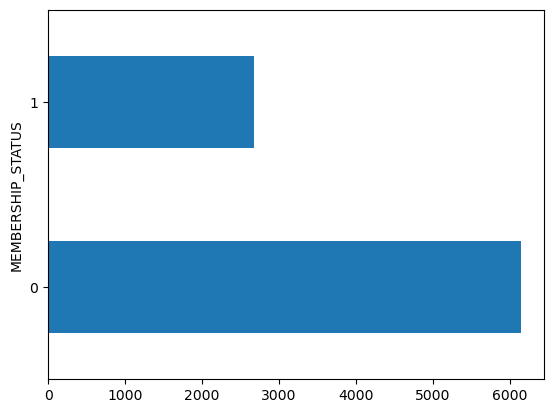

In [14]:
# kind='bar' 옵션 : 바 그래프를 그린다.
df['MEMBERSHIP_STATUS'].value_counts().plot(kind='barh')

In [18]:
df['MEMBERSHIP_TERM_YEARS']

0       22
1       88
2       93
3       17
4       39
        ..
8802    17
8803    49
8804    54
8805    27
8806    12
Name: MEMBERSHIP_TERM_YEARS, Length: 8807, dtype: int64

<Axes: ylabel='Frequency'>

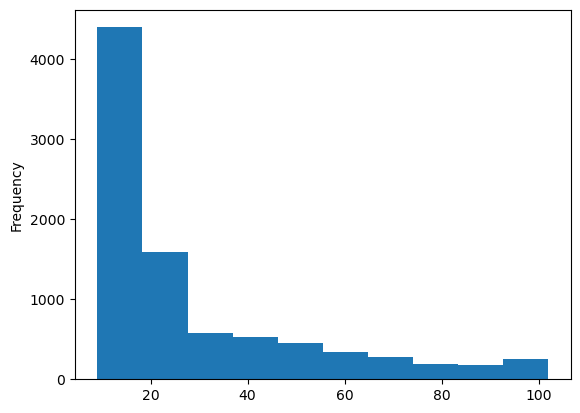

In [20]:
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist')

<Axes: xlabel='MEMBERSHIP_TERM_YEARS', ylabel='Count'>

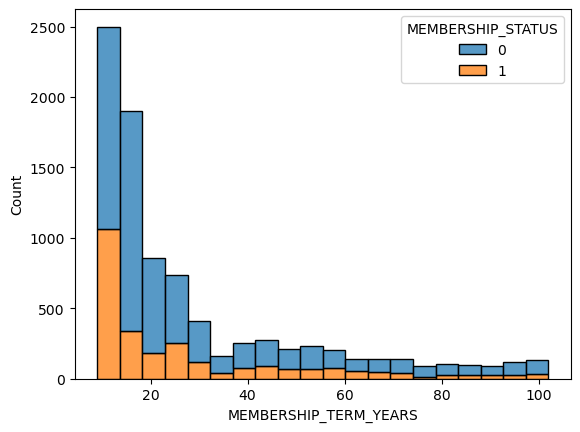

In [21]:
sns.histplot(data=df, x='MEMBERSHIP_TERM_YEARS', hue = 'MEMBERSHIP_STATUS', bins=20, multiple='stack')  
# multiple='fill' : 상대비율, multiple='stack' : 절대비율

<Axes: >

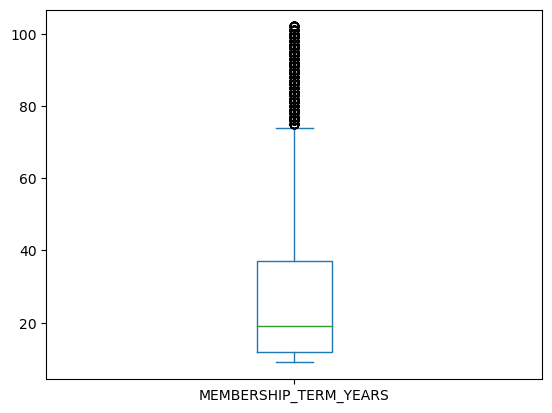

In [58]:
df['MEMBERSHIP_TERM_YEARS'].plot(kind='box')

In [24]:
df.head(1)

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.0,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN


<Axes: xlabel='MEMBERSHIP_STATUS', ylabel='MEMBERSHIP_TERM_YEARS'>

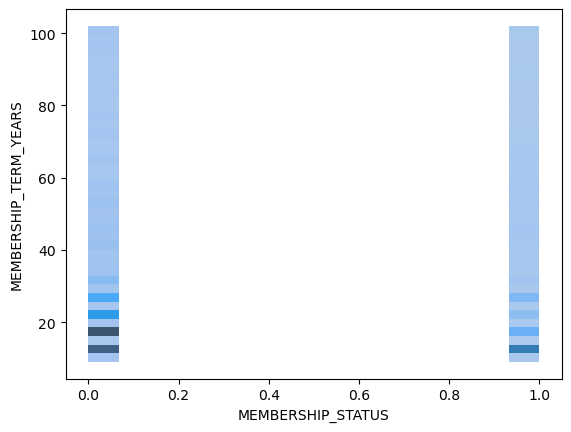

In [27]:
# histplot : 연속형 범주 다룰 때
sns.histplot(data=df,x='MEMBERSHIP_STATUS' ,y='MEMBERSHIP_TERM_YEARS')

<Axes: xlabel='MEMBERSHIP_STATUS', ylabel='MEMBERSHIP_TERM_YEARS'>

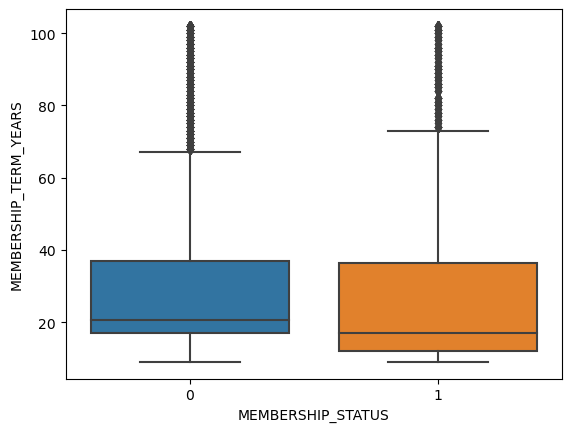

In [29]:
sns.boxplot(data=df,x='MEMBERSHIP_STATUS' ,y='MEMBERSHIP_TERM_YEARS')
# 범주 : 시각화할 변수(해당변수의 수치형 변수의 분포를 비교), 수치 : 비교할 변수(수량으로 분포를 비교)

<Axes: ylabel='Density'>

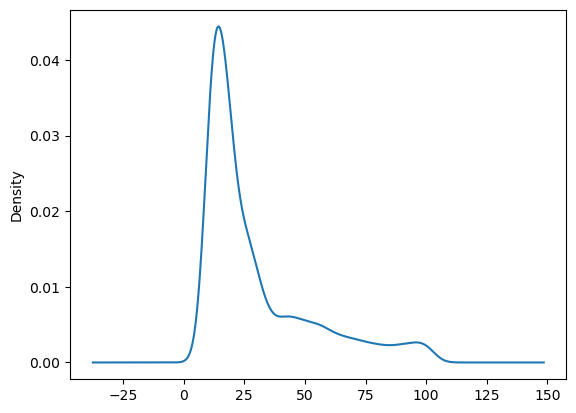

In [59]:
df['MEMBERSHIP_TERM_YEARS'].plot(kind='kde')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'MEMBERSHIP_TERM_YEARS'}>,
        <Axes: title={'center': 'ANNUAL_FEES'}>],
       [<Axes: title={'center': 'MEMBER_ANNUAL_INCOME'}>,
        <Axes: title={'center': 'MEMBER_OCCUPATION_CD'}>,
        <Axes: title={'center': 'MEMBER_AGE_AT_ISSUE'}>],
       [<Axes: title={'center': 'ADDITIONAL_MEMBERS'}>,
        <Axes: title={'center': 'MEMBERSHIP_STATUS'}>,
        <Axes: title={'center': 'START_DATE'}>],
       [<Axes: title={'center': 'END_DATE'}>, <Axes: >, <Axes: >]],
      dtype=object)

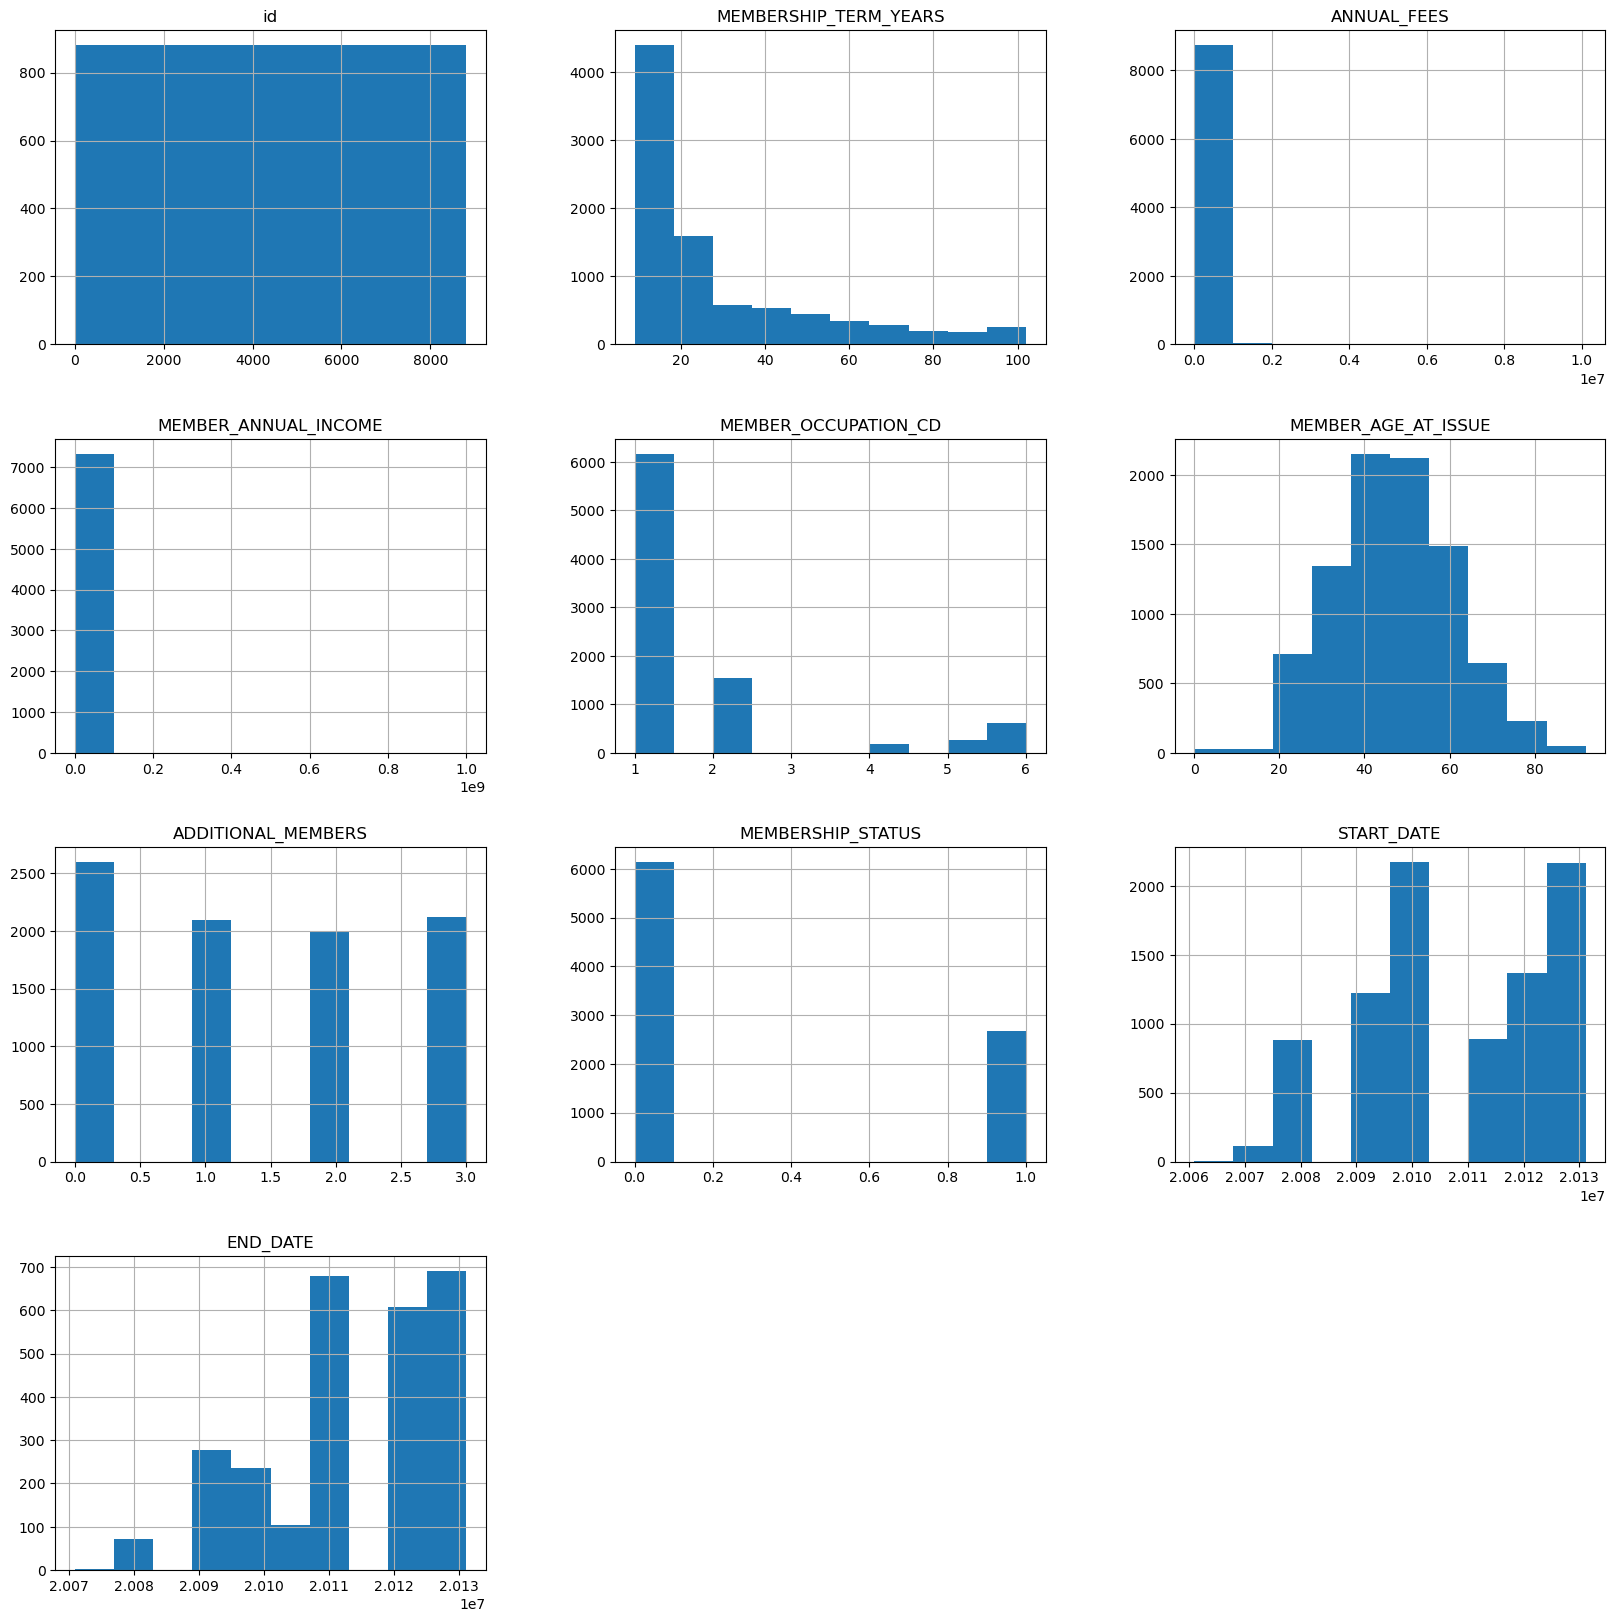

In [60]:
df.hist(figsize=(20, 20))

# 여러 개의 그래프를 동시에 표시 - subplot 사용법

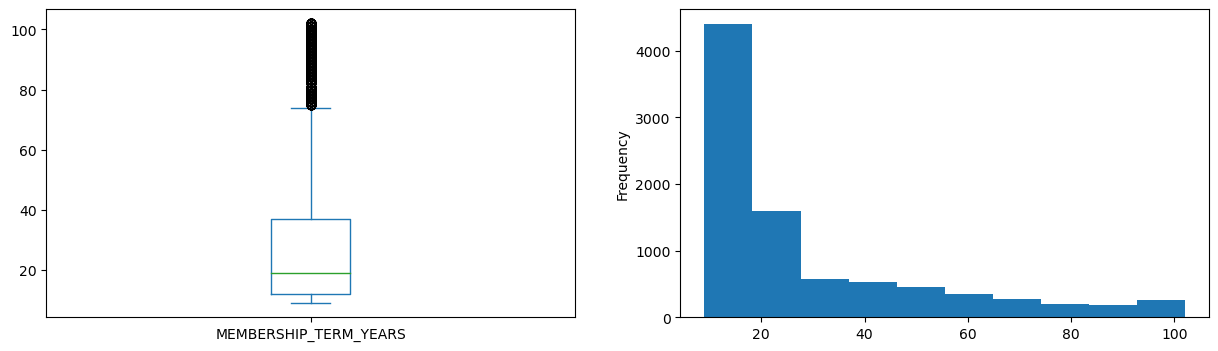

In [61]:
# MATLAB 스타일

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)      # 세로 개수, 가로 개수, 차트 순서
df['MEMBERSHIP_TERM_YEARS'].plot(kind='box')

plt.subplot(1, 2, 2)
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist')

plt.show()

<Axes: >

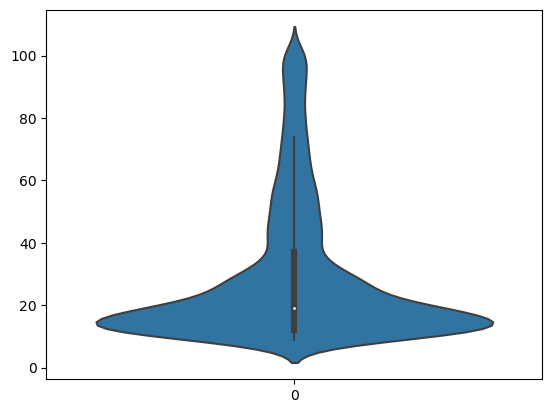

In [62]:
sns.violinplot(df['MEMBERSHIP_TERM_YEARS'])

In [21]:
df.columns

Index(['id', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS',
       'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD',
       'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS', 'START_DATE',
       'END_DATE'],
      dtype='object')

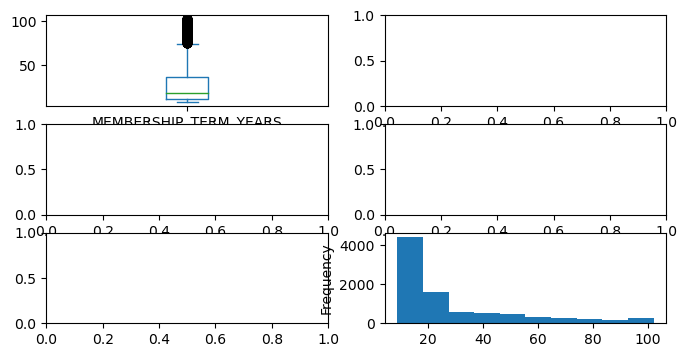

In [63]:
### 객체지향 스타일

fig, ax = plt.subplots(3, 2, figsize=(8, 4)) 

df['MEMBERSHIP_TERM_YEARS'].plot(kind='box', ax=ax[0, 0])
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist', ax=ax[2, 1])

plt.show()

In [64]:
print(fig)

Figure(800x400)


In [65]:
print(ax)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: ylabel='Frequency'>]]


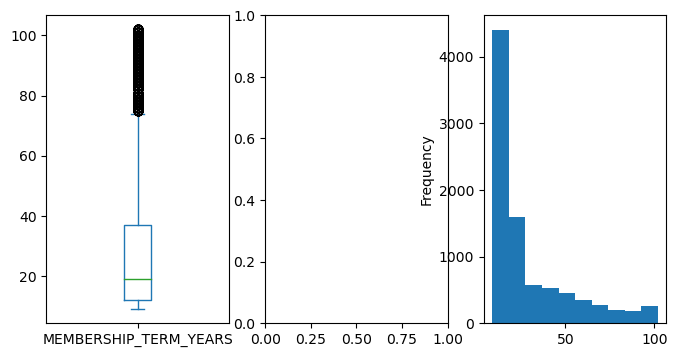

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4)) 

df['MEMBERSHIP_TERM_YEARS'].plot(kind='box', ax=ax[0])
df['MEMBERSHIP_TERM_YEARS'].plot(kind='hist', ax=ax[2])

plt.show()

# ydata-profiling
https://github.com/ydataai/ydata-profiling


In [69]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

profile = ProfileReport(df, title="Profiling Report")
# 결과를 .폴더 내 'your_report.html'파일로 저장한다.
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Seaborn 시각화

In [15]:
df.head(2)

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN


<Axes: xlabel='MEMBER_ANNUAL_INCOME', ylabel='Count'>

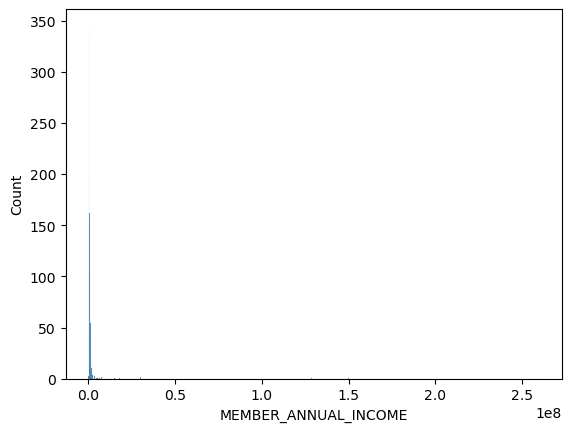

In [16]:
sns.histplot(x='MEMBER_ANNUAL_INCOME', data=df.dropna())

<AxesSubplot: ylabel='Frequency'>

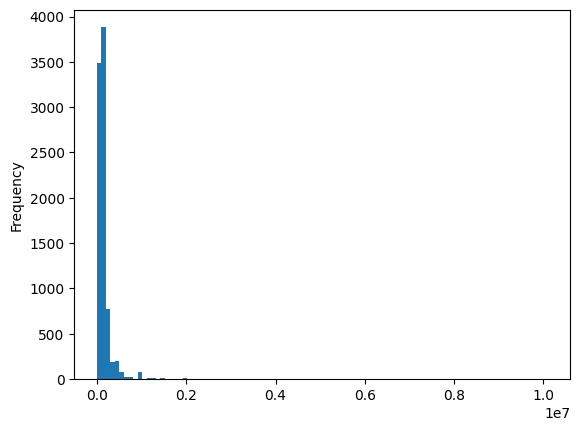

In [28]:
df['ANNUAL_FEES'].plot(kind='hist', bins=100)

In [29]:
df.columns

Index(['id', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS',
       'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD',
       'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS', 'START_DATE',
       'END_DATE'],
      dtype='object')

## 범주형 변수의 수량을 시각화

In [30]:
categorical_cols = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 
                    'MEMBERSHIP_PACKAGE', 'MEMBER_OCCUPATION_CD', 
                    'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
                   ]

### Count Plot  

In [31]:
df['MEMBER_MARITAL_STATUS'].value_counts(dropna=False)

M      5455
NaN    2210
S       977
W       128
D        37
Name: MEMBER_MARITAL_STATUS, dtype: int64

In [32]:
df['MEMBERSHIP_STATUS'].unique()

array([0, 1])

In [33]:
df['MEMBERSHIP_STATUS'].nunique()

2

In [34]:
df['MEMBERSHIP_STATUS'].value_counts()

0    6136
1    2671
Name: MEMBERSHIP_STATUS, dtype: int64

<AxesSubplot: xlabel='MEMBER_MARITAL_STATUS', ylabel='count'>

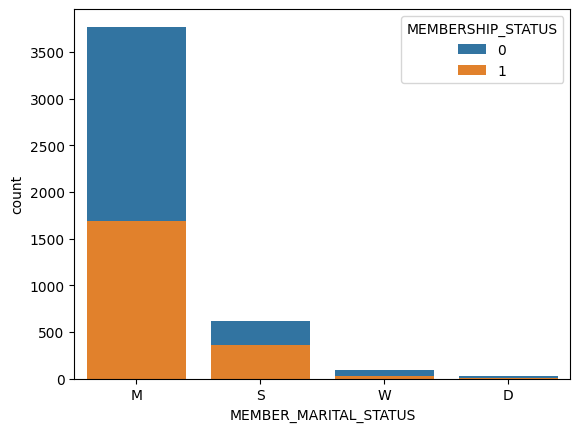

In [35]:
sns.countplot(data=df, x='MEMBER_MARITAL_STATUS', hue='MEMBERSHIP_STATUS', dodge=False)
# dodge : 누적여부(나란히보여준다.)

<AxesSubplot: ylabel='count'>

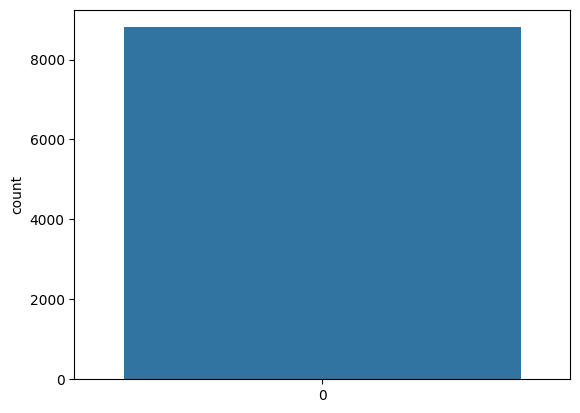

In [36]:
sns.countplot(df['MEMBERSHIP_STATUS'])

<AxesSubplot: xlabel='count', ylabel='PAYMENT_MODE'>

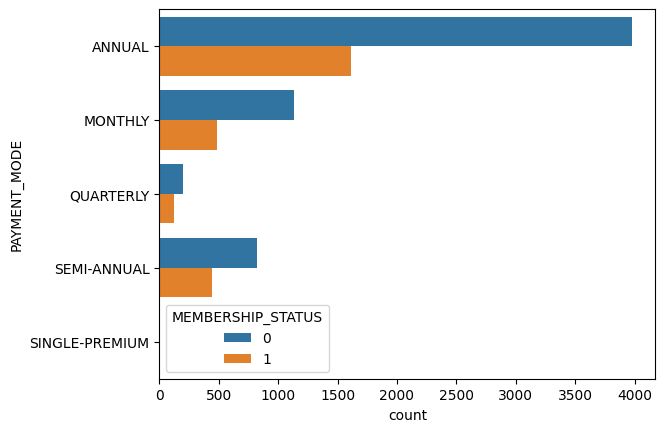

In [37]:
sns.countplot(data=df, y='PAYMENT_MODE', hue='MEMBERSHIP_STATUS')

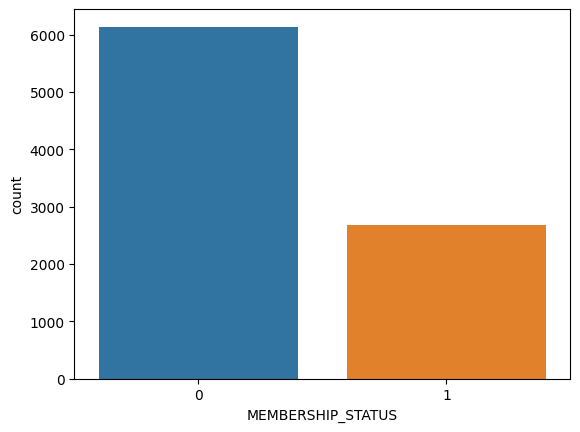

In [38]:
sns.countplot(x='MEMBERSHIP_STATUS', data=df);

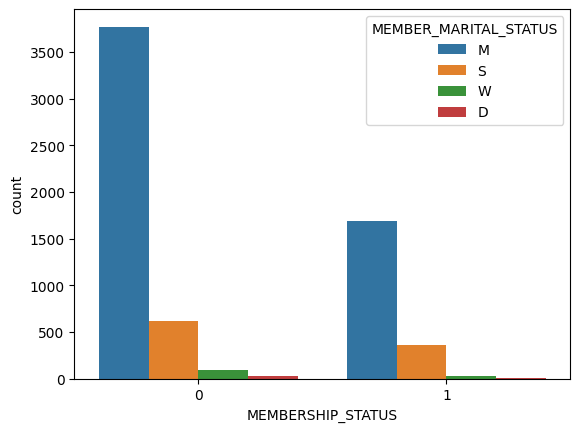

In [39]:
sns.countplot(x='MEMBERSHIP_STATUS', hue='MEMBER_MARITAL_STATUS', data=df)

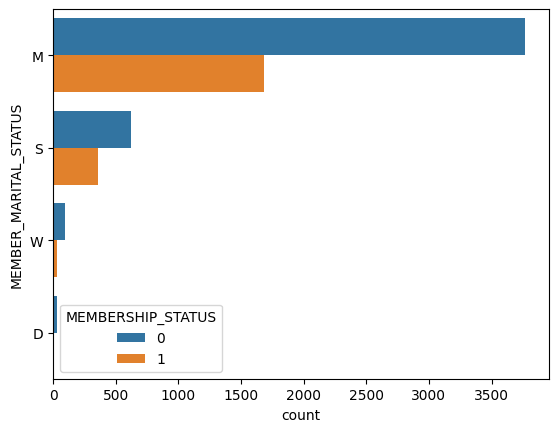

In [40]:
sns.countplot(y='MEMBER_MARITAL_STATUS', hue='MEMBERSHIP_STATUS', data=df);

## Quiz  
다른 범주형 변수를 찾아서, countplot으로 데이터의 수량을 시각화합니다. 

## 연속형 변수의 분포를 시각화

In [41]:
numeric_cols = ['MEMBERSHIP_TERM_YEARS','ANNUAL_FEES','MEMBER_ANNUAL_INCOME',
                'MEMBER_AGE_AT_ISSUE','ADDITIONAL_MEMBERS',
                'START_DATE (YYYYMMDD)','END_DATE  (YYYYMMDD)']

### Distribution Plot

In [42]:
# sns.distplot(df['MEMBER_AGE_AT_ISSUE'])

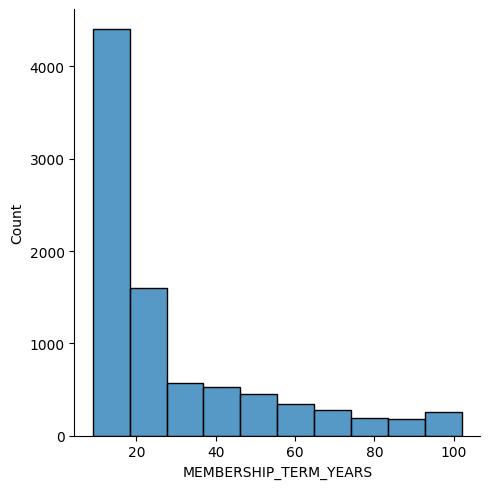

In [43]:
sns.displot(data=df, x='MEMBERSHIP_TERM_YEARS', kind='hist', bins=10)

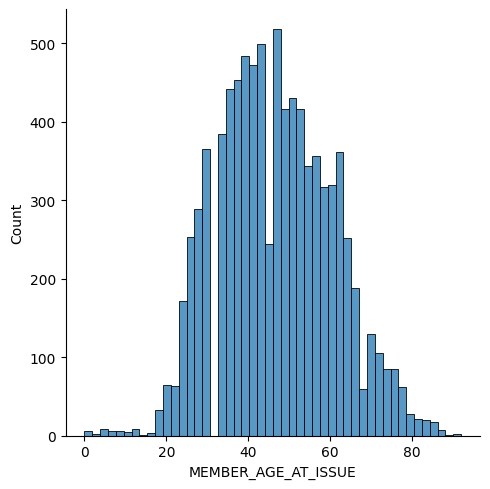

In [44]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', kind='hist', data=df);

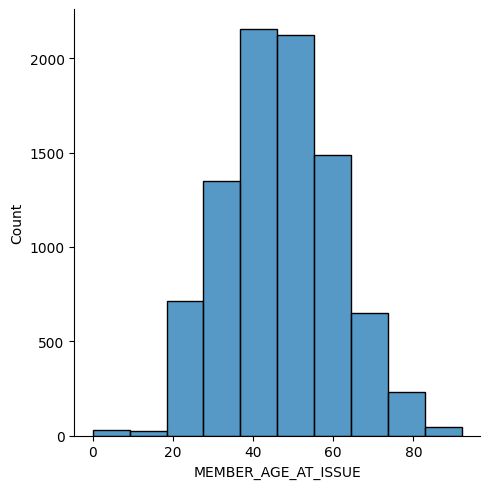

In [45]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', data=df, bins=10);

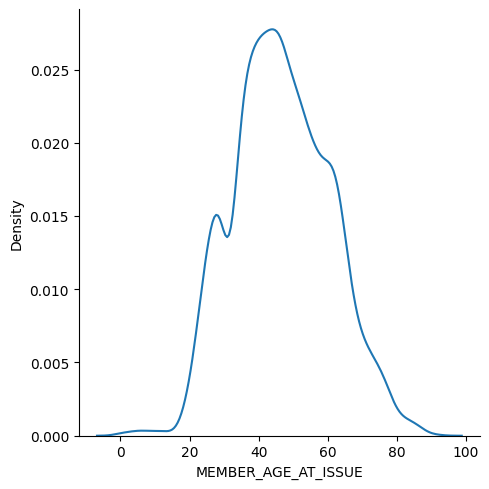

In [46]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', kind='kde', data=df);

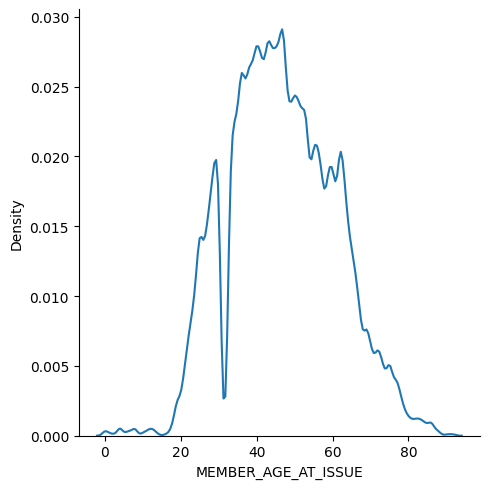

In [47]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', kind='kde', data=df, bw_adjust=0.3);

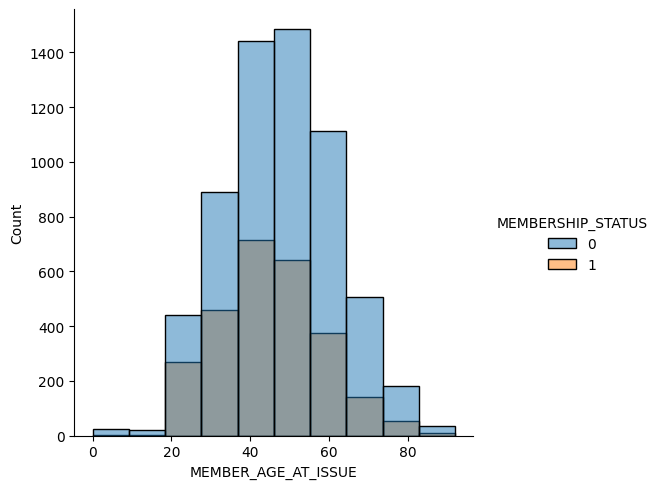

In [48]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', data=df, bins=10);

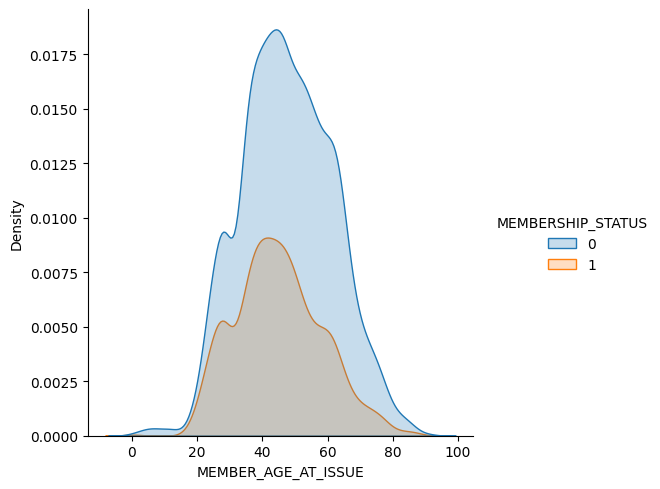

In [49]:
sns.displot(x='MEMBER_AGE_AT_ISSUE', hue='MEMBERSHIP_STATUS', kind='kde', data=df, fill=True);

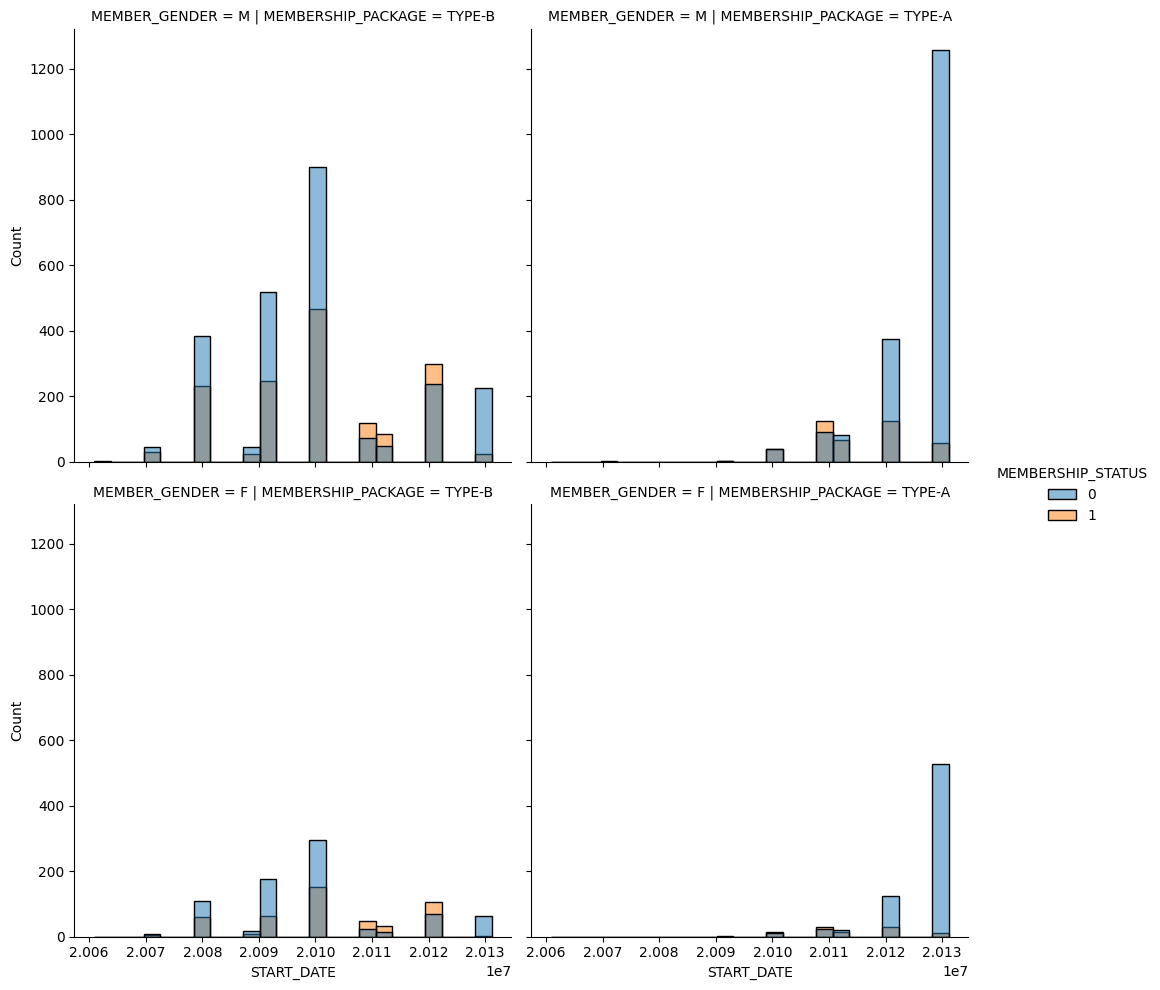

In [50]:
sns.displot(row='MEMBER_GENDER', col='MEMBERSHIP_PACKAGE', x='START_DATE', hue='MEMBERSHIP_STATUS', kind='hist', data=df);

## Box Plot

In [51]:
df['MEMBERSHIP_STATUS'].value_counts()

0    6136
1    2671
Name: MEMBERSHIP_STATUS, dtype: int64

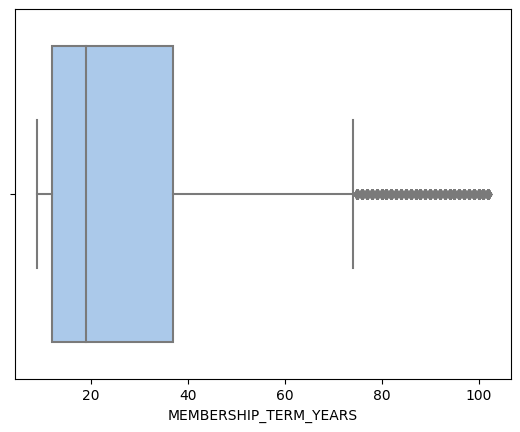

In [52]:
sns.boxplot(x='MEMBERSHIP_TERM_YEARS', data=df, palette='pastel');

In [53]:
df.columns

Index(['id', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS',
       'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD',
       'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS', 'START_DATE',
       'END_DATE'],
      dtype='object')

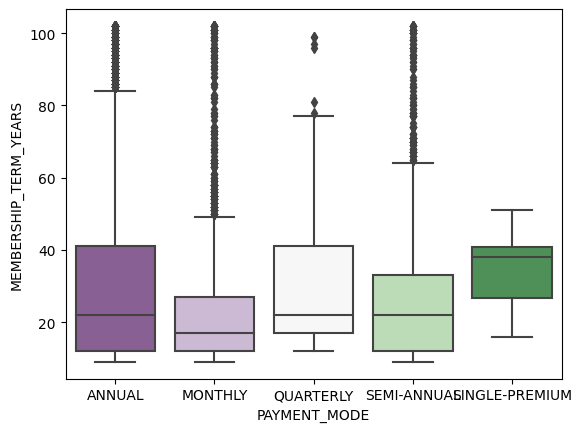

In [54]:
sns.boxplot(x='PAYMENT_MODE', y='MEMBERSHIP_TERM_YEARS', data=df, palette="PRGn");

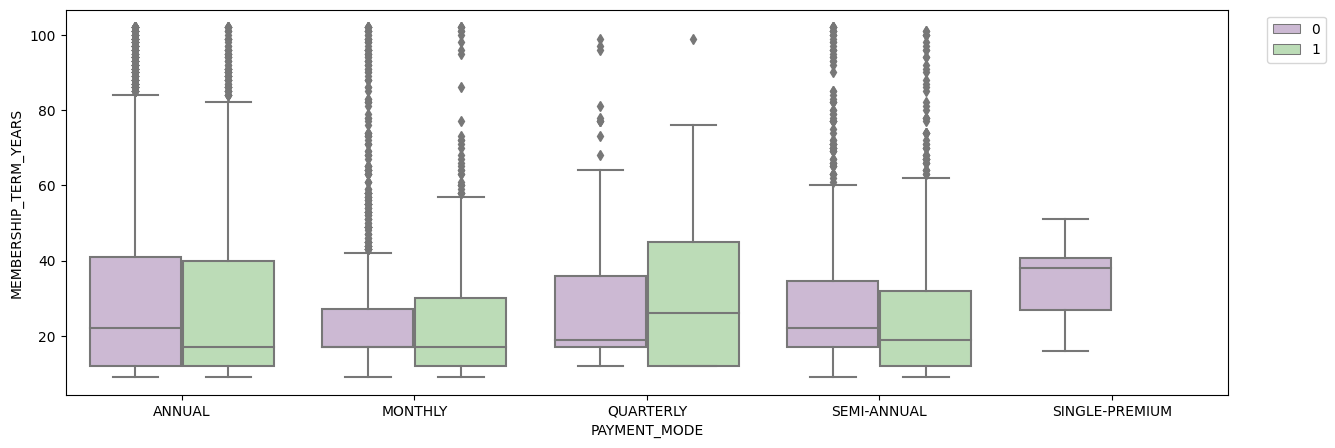

In [55]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='PAYMENT_MODE', y='MEMBERSHIP_TERM_YEARS', hue='MEMBERSHIP_STATUS', data=df, palette="PRGn")
plt.legend(bbox_to_anchor=(1.09, 1))
plt.show()

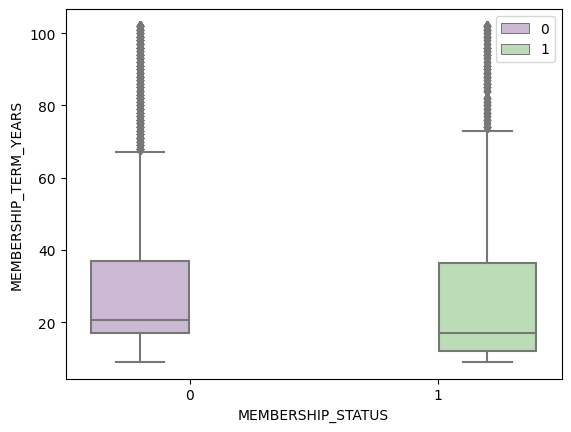

In [56]:
sns.boxplot(x='MEMBERSHIP_STATUS', y='MEMBERSHIP_TERM_YEARS', hue="MEMBERSHIP_STATUS", data=df, palette="PRGn")

plt.legend(loc="upper right")
plt.show()

## Violin Plot

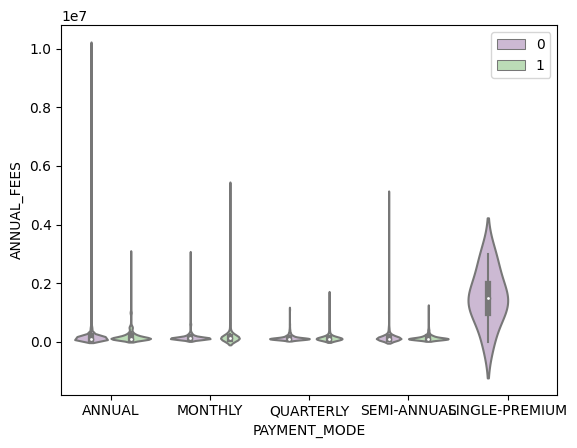

In [57]:
sns.violinplot(x='PAYMENT_MODE', y='ANNUAL_FEES', hue="MEMBERSHIP_STATUS", data=df, palette="PRGn")
plt.legend(loc="upper right")
plt.show()

## Strip Plot

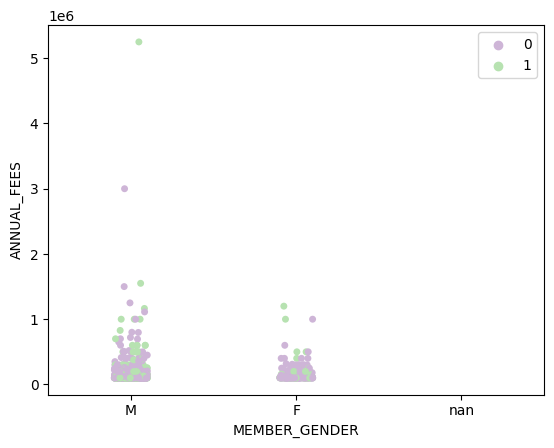

In [58]:
sns.stripplot(x='MEMBER_GENDER', y='ANNUAL_FEES', hue="MEMBERSHIP_STATUS", data=df.sample(1000), palette="PRGn")
plt.legend(loc="upper right")
plt.show()

## Bar Plot

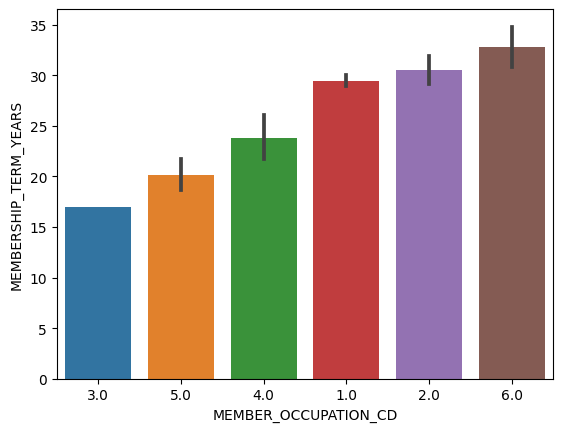

In [59]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', data=df, order=[3.0, 5.0, 4.0, 1.0, 2.0, 6.0]);

In [62]:
# 데이터 정렬

sorted_index = df.loc[:, ['MEMBER_OCCUPATION_CD', 'MEMBERSHIP_TERM_YEARS']].groupby('MEMBER_OCCUPATION_CD').mean().sort_values(by='MEMBERSHIP_TERM_YEARS', ascending=False).index
sorted_index

Float64Index([6.0, 2.0, 1.0, 4.0, 5.0, 3.0], dtype='float64', name='MEMBER_OCCUPATION_CD')

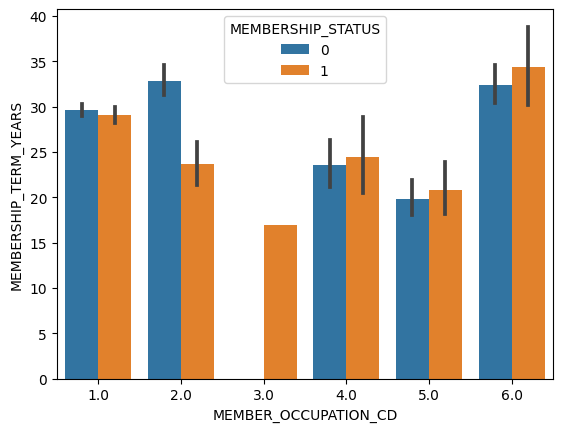

In [66]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', hue='MEMBERSHIP_STATUS', data=df);

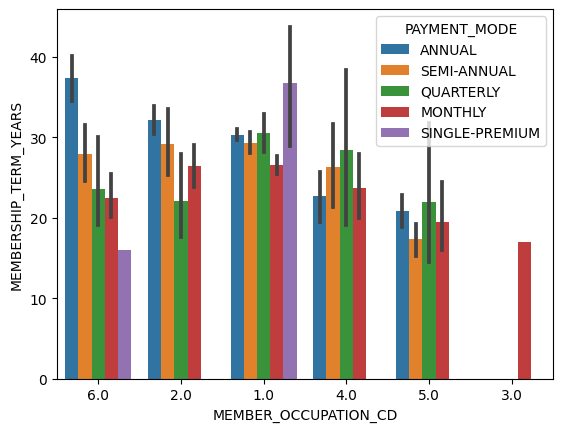

In [67]:
sns.barplot(x='MEMBER_OCCUPATION_CD', y='MEMBERSHIP_TERM_YEARS', 
            hue='PAYMENT_MODE', hue_order=['ANNUAL', 'SEMI-ANNUAL', 'QUARTERLY', 'MONTHLY', 'SINGLE-PREMIUM'], 
            data=df, order=sorted_index);

## Scatter Plot

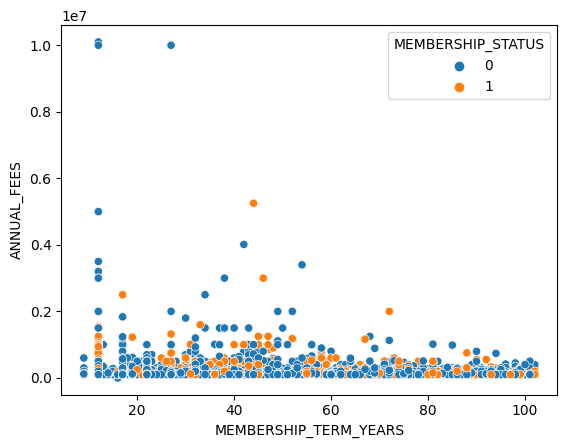

In [68]:
sns.scatterplot(x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', hue='MEMBERSHIP_STATUS', data=df)
plt.show()

## LM Plot

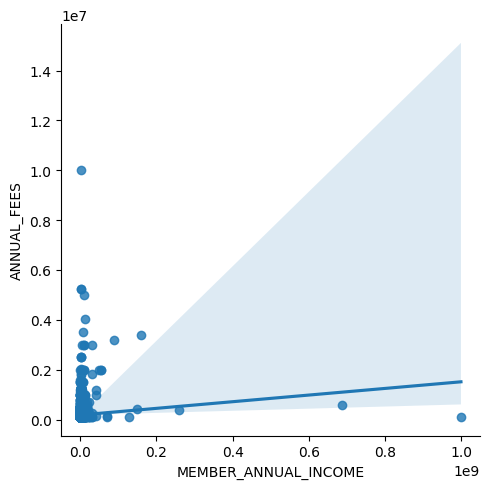

In [69]:
sns.lmplot(x='MEMBER_ANNUAL_INCOME', y='ANNUAL_FEES', data=df)
plt.show()

## KDE Plot

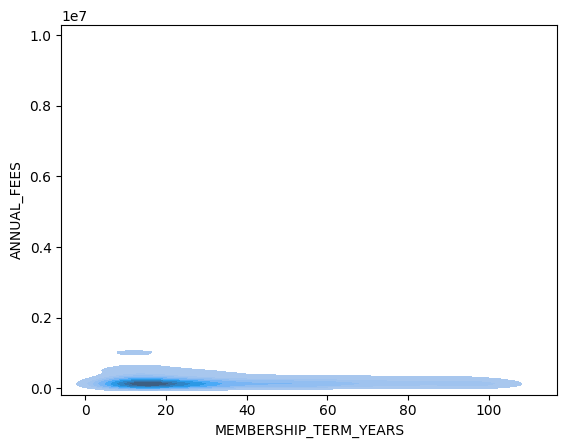

In [70]:
sns.kdeplot(x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', data=df, shade=True);

## Joint Plot

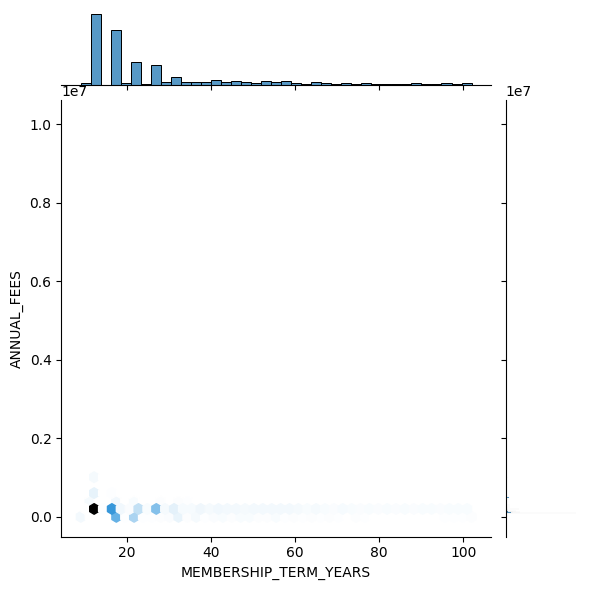

In [71]:
sns.jointplot(x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', kind='hex', data=df)

# 데이터 전처리2 
 
- 필터링, 정제, 변환

### 행 필터 (불린 인덱싱)

In [72]:
df['MEMBER_GENDER'] == "M"

0        True
1        True
2        True
3       False
4        True
        ...  
8802    False
8803     True
8804     True
8805     True
8806     True
Name: MEMBER_GENDER, Length: 8807, dtype: bool

In [73]:
df.loc[ df['MEMBER_GENDER'] != "M"  ,  : ]

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
5,5,27,100001.00,NaN,NaN,NaN,1.0,TYPE-B,59,0,ANNUAL,802744,1,20100106,20110307.0
11,11,17,100000.06,M,F,499992.0,1.0,TYPE-A,43,3,ANNUAL,1268822,0,20130530,NaN
15,15,36,100000.00,S,F,300000.0,1.0,TYPE-B,58,0,ANNUAL,900622,0,20100831,NaN
19,19,21,101000.00,W,F,368004.0,1.0,TYPE-B,74,0,ANNUAL,936822,0,20100615,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,8786,22,120000.96,M,F,249996.0,1.0,TYPE-B,37,3,MONTHLY,809422,0,20091123,NaN
8793,8793,9,120000.96,M,F,249996.0,1.0,TYPE-B,25,3,MONTHLY,259355,0,20090313,NaN
8797,8797,22,119999.88,M,F,380004.0,5.0,TYPE-B,46,3,MONTHLY,639666,1,20090331,20090727.0
8800,8800,31,120000.96,W,F,300000.0,1.0,TYPE-B,59,0,MONTHLY,183611,1,20100304,20100703.0


In [74]:
df.loc[df["MEMBER_AGE_AT_ISSUE"] > 50, :]

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
5,5,27,100001.00,NaN,NaN,NaN,1.0,TYPE-B,59,0,ANNUAL,802744,1,20100106,20110307.0
10,10,97,100513.44,NaN,M,NaN,6.0,TYPE-A,60,0,QUARTERLY,1132833,0,20110328,NaN
12,12,21,120000.96,M,M,300000.0,1.0,TYPE-B,64,2,MONTHLY,639944,1,20090720,20110216.0
13,13,12,200000.00,NaN,M,NaN,1.0,TYPE-B,59,0,ANNUAL,91799,0,20101029,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,8796,32,200000.00,M,M,249996.0,1.0,TYPE-B,63,3,SEMI-ANNUAL,1101755,1,20100809,20110408.0
8799,8799,32,200000.00,M,M,1249992.0,1.0,TYPE-A,59,1,ANNUAL,1330944,0,20121218,NaN
8800,8800,31,120000.96,W,F,300000.0,1.0,TYPE-B,59,0,MONTHLY,183611,1,20100304,20100703.0
8802,8802,17,100000.00,NaN,NaN,NaN,1.0,TYPE-B,53,0,ANNUAL,744188,0,20100115,NaN


In [75]:
# AND 연산
(df['MEMBER_GENDER'] == "M") & (df["MEMBER_AGE_AT_ISSUE"] > 50) 

0       False
1        True
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804     True
8805    False
8806    False
Length: 8807, dtype: bool

In [76]:
# OR 연산
(df['MEMBER_GENDER'] == "M") | (df["MEMBER_AGE_AT_ISSUE"] > 50) 

0        True
1        True
2        True
3       False
4        True
        ...  
8802     True
8803     True
8804     True
8805     True
8806     True
Length: 8807, dtype: bool

In [77]:
df.loc[(df['MEMBER_GENDER'] == "M") | (df["MEMBER_AGE_AT_ISSUE"] > 50) , :]

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN
5,5,27,100001.00,NaN,NaN,NaN,1.0,TYPE-B,59,0,ANNUAL,802744,1,20100106,20110307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,NaN,NaN,NaN,1.0,TYPE-B,53,0,ANNUAL,744188,0,20100115,NaN
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208,NaN
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331,NaN
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127,NaN


## Quiz  
데이터프레임에서, 20대 기혼인 고객 데이터를 추출합니다.  
reset_index 명령을 사용하여 행 인덱스를 초기화하고, 새로운 데이터프레임의 크기(행, 열)를 출력합니다.  

In [78]:
df.head(3)

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN


### 결측값 제거

In [79]:
df.isnull().sum()

id                          0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2210
MEMBER_GENDER             502
MEMBER_ANNUAL_INCOME     1469
MEMBER_OCCUPATION_CD       34
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE                  0
END_DATE                 6136
dtype: int64

In [80]:
df.dropna()

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
9,9,12,300002.40,M,M,349992.0,1.0,TYPE-B,46,2,MONTHLY,1360477,1,20121130,20130329.0
12,12,21,120000.96,M,M,300000.0,1.0,TYPE-B,64,2,MONTHLY,639944,1,20090720,20110216.0
24,24,29,100000.00,W,F,300000.0,1.0,TYPE-B,56,0,ANNUAL,225288,1,20080623,20100822.0
29,29,12,100000.00,M,M,249996.0,1.0,TYPE-B,46,1,SEMI-ANNUAL,66088,1,20080603,20100201.0
30,30,53,120000.96,S,M,274992.0,1.0,TYPE-B,29,0,MONTHLY,549577,1,20081229,20090428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8790,9,100000.00,M,M,399996.0,1.0,TYPE-B,28,2,ANNUAL,589355,1,20090112,20100311.0
8796,8796,32,200000.00,M,M,249996.0,1.0,TYPE-B,63,3,SEMI-ANNUAL,1101755,1,20100809,20110408.0
8797,8797,22,119999.88,M,F,380004.0,5.0,TYPE-B,46,3,MONTHLY,639666,1,20090331,20090727.0
8800,8800,31,120000.96,W,F,300000.0,1.0,TYPE-B,59,0,MONTHLY,183611,1,20100304,20100703.0


In [81]:
df['MEMBER_GENDER'].dropna()

0       M
1       M
2       M
3       F
4       M
       ..
8801    M
8803    M
8804    M
8805    M
8806    M
Name: MEMBER_GENDER, Length: 8305, dtype: object

In [82]:
df['MEMBER_GENDER'].dropna().shape

(8305,)

In [83]:
df['MEMBER_GENDER'].shape

(8807,)

### 결측값 대체

In [84]:
df_new = df.copy()
df_new.loc[df_new["MEMBER_GENDER"].isnull(), "MEMBER_GENDER"] = df_new["MEMBER_GENDER"].mode()[0]
df_new["MEMBER_GENDER"].value_counts()

M    6751
F    2056
Name: MEMBER_GENDER, dtype: int64

In [85]:
df_new["MEMBER_ANNUAL_INCOME"].value_counts(dropna=False)

NaN          1469
399996.0      518
999996.0      512
300000.0      489
600000.0      458
             ... 
209448.0        1
520860.0        1
161220.0        1
341508.0        1
2250000.0       1
Name: MEMBER_ANNUAL_INCOME, Length: 720, dtype: int64

In [86]:
df_new["MEMBER_ANNUAL_INCOME"].mean()

1375036.0850367947

In [87]:
df_new["MEMBER_ANNUAL_INCOME"] = df_new["MEMBER_ANNUAL_INCOME"].fillna(df_new["MEMBER_ANNUAL_INCOME"].mean())
df_new["MEMBER_ANNUAL_INCOME"].isnull().sum()

0

### 이상치 처리

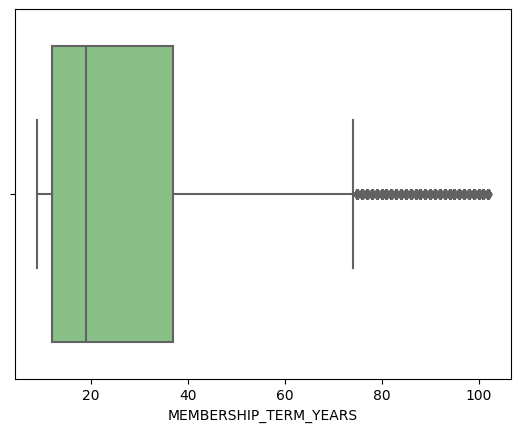

In [89]:
sns.boxplot(x='MEMBERSHIP_TERM_YEARS', data=df, palette='Accent');

In [90]:
# 80년 이상인 데이터를 삭제
df.loc[df['MEMBERSHIP_TERM_YEARS'] < 80, :]

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN
5,5,27,100001.00,NaN,NaN,NaN,1.0,TYPE-B,59,0,ANNUAL,802744,1,20100106,20110307.0
6,6,17,103016.16,S,M,999996.0,2.0,TYPE-A,35,0,MONTHLY,348099,0,20130930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,NaN,NaN,NaN,1.0,TYPE-B,53,0,ANNUAL,744188,0,20100115,NaN
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208,NaN
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331,NaN
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127,NaN


In [91]:
# 80년 이상에 대해서는 최대값을 80으로 고정
# df.loc[df['MEMBERSHIP_TERM_YEARS'] > 80, 'MEMBERSHIP_TERM_YEARS'] = 80

### 함수 매핑

In [92]:
df_new['MEMBER_MARITAL_STATUS'].value_counts(dropna=False)

M      5455
NaN    2210
S       977
W       128
D        37
Name: MEMBER_MARITAL_STATUS, dtype: int64

In [93]:
df_new['MEMBER_MARITAL_STATUS'] = df_new['MEMBER_MARITAL_STATUS'].map({'M':0, 'S':1, 'W':2, 'D':3})
df_new['MEMBER_MARITAL_STATUS'].value_counts(dropna=False)

0.0    5455
NaN    2210
1.0     977
2.0     128
3.0      37
Name: MEMBER_MARITAL_STATUS, dtype: int64

In [94]:
package_encoding = {'TYPE-A':0, 'TYPE-B':1}

# map
df_new['MEMBERSHIP_PACKAGE'].map(package_encoding)

0       1
1       0
2       0
3       0
4       1
       ..
8802    1
8803    1
8804    0
8805    1
8806    1
Name: MEMBERSHIP_PACKAGE, Length: 8807, dtype: int64

In [95]:
# apply - lambda
df_new['MEMBERSHIP_PACKAGE'].apply(lambda x: package_encoding[x])

0       1
1       0
2       0
3       0
4       1
       ..
8802    1
8803    1
8804    0
8805    1
8806    1
Name: MEMBERSHIP_PACKAGE, Length: 8807, dtype: int64

In [96]:
# np.where 연산

np.where(df_new['MEMBERSHIP_PACKAGE']=='TYPE-A', 0, 1)

array([1, 0, 0, ..., 0, 1, 1])

## Quiz  
MEMBER_AGE_AT_ISSUE 열의 나이를 비식별화 합니다. (20대, 30대, 40대, ...)

<AxesSubplot: >

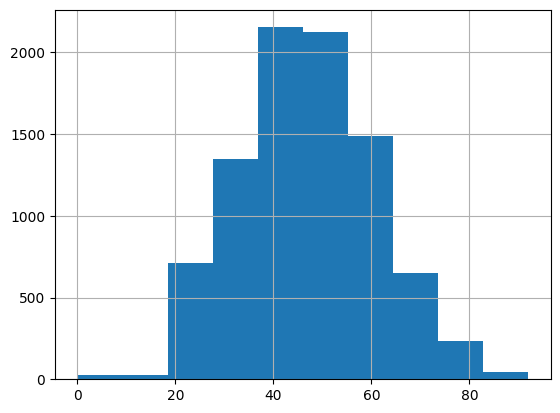

In [97]:
# 히스토그램 
df_new['MEMBER_AGE_AT_ISSUE'].hist()